In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv('Loan approval prediction.csv')
df.head()
df_copy = df.copy()
df_copy

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [2]:
# فلترة القروض المقبولة
accepted_loans_d = df[df['loan_status'] == 1]

# طباعة أول صف مقبول
print(accepted_loans_d.iloc[0])

# أو طباعة صف عشوائي مقبول
print(accepted_loans_d.sample(1))


id                                  11
person_age                          22
person_income                    33000
person_home_ownership             RENT
person_emp_length                  6.0
loan_intent                   PERSONAL
loan_grade                           B
loan_amnt                        10000
loan_int_rate                    11.12
loan_percent_income                0.3
cb_person_default_on_file            N
cb_person_cred_hist_length           2
loan_status                          1
Name: 11, dtype: object
          id  person_age  person_income person_home_ownership  \
32658  32658          28          68670              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
32658                2.0  DEBTCONSOLIDATION          E       6000   

       loan_int_rate  loan_percent_income cb_person_default_on_file  \
32658          17.54                 0.09                         Y   

       cb_person_cred_hist_length  loan_status  
32658  

In [3]:
df_copy.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
df_copy.duplicated().sum()

0

In [6]:
df_copy.select_dtypes(include='object').columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [7]:
df_copy.select_dtypes(include='int64').columns

Index(['id', 'person_age', 'person_income', 'loan_amnt',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [8]:
df.shape


(58645, 13)

In [9]:
df['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [10]:
df['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [11]:
df['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
df['loan_status'].unique()

array([0, 1], dtype=int64)

In [13]:
unique_values = df.select_dtypes(include='object').apply(lambda col: col.unique())
print(unique_values)

person_home_ownership                             [RENT, OWN, MORTGAGE, OTHER]
loan_intent                  [EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO...
loan_grade                                               [B, C, A, D, E, F, G]
cb_person_default_on_file                                               [N, Y]
dtype: object


In [14]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [15]:
df_copy= df_copy.drop(columns = ['id'])

In [16]:
df_copy.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [17]:
age_count = df_copy['person_age'].value_counts().sort_values( ascending=False)
age_count

person_age
23     7726
22     7051
24     6395
25     5067
27     4450
26     3874
28     3707
29     3270
30     2333
31     1917
21     1795
32     1565
33     1306
36     1117
34     1041
37      992
35      862
38      745
39      536
40      438
41      433
43      320
42      291
44      229
46      164
45      163
47      125
48       97
53       75
51       69
50       63
52       62
54       60
49       59
58       35
55       34
56       29
60       28
57       25
61       13
65       13
20       12
66       11
64       10
70       10
62        7
69        6
59        6
73        3
84        2
80        2
76        1
123       1
Name: count, dtype: int64

In [18]:
outliers_age = df_copy[df_copy['person_age'] > 100]
print(outliers_age)

       person_age  person_income person_home_ownership  person_emp_length  \
47336         123          36000              MORTGAGE                7.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
47336    PERSONAL          B       6700          10.75                 0.18   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
47336                         N                           4            0  


In [19]:
# This code removes rows where the 'person_age' column has values greater than 100,
df_copy.drop(df_copy[df_copy['person_age'] > 100].index,inplace=True)

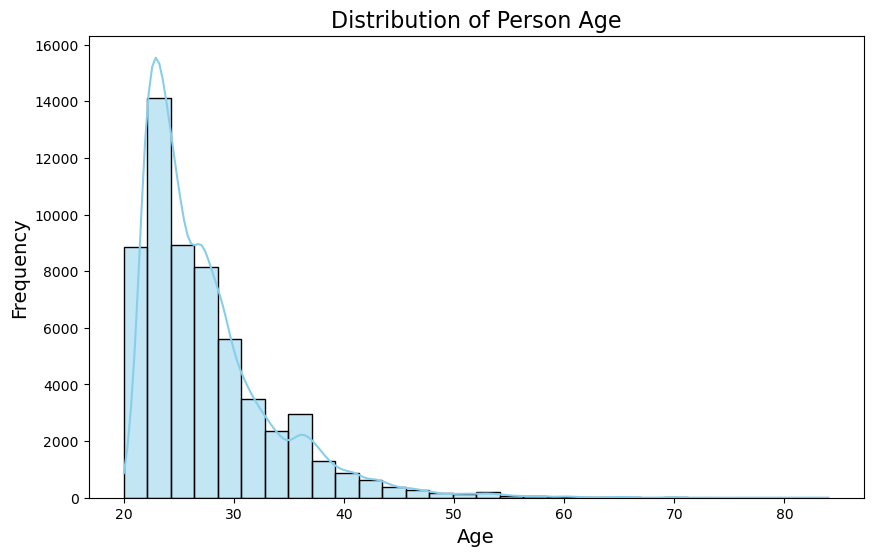

In [20]:
# Plot the distribution of 'person_age'
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['person_age'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Person Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [21]:
top_20_income = df_copy.nlargest(40, 'person_income')
top_20_income

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
17387,22,1900000,MORTGAGE,6.0,EDUCATION,D,1500,15.62,0.00,Y,3,0
12404,25,1839784,RENT,0.0,VENTURE,A,8000,8.00,0.04,N,3,0
37591,29,1824000,MORTGAGE,8.0,DEBTCONSOLIDATION,C,6000,13.99,0.03,N,6,0
2093,32,1200000,RENT,2.0,PERSONAL,A,10000,7.51,0.01,N,9,0
19060,32,1200000,MORTGAGE,16.0,DEBTCONSOLIDATION,A,16000,6.92,0.13,N,5,0
11422,29,948000,OWN,11.0,PERSONAL,B,4000,11.83,0.04,N,5,0
34752,27,928000,MORTGAGE,8.0,VENTURE,C,2850,13.92,0.01,N,7,0
18465,32,900000,RENT,13.0,PERSONAL,B,25000,11.49,0.03,N,5,0
31446,26,900000,MORTGAGE,3.0,VENTURE,B,6000,9.91,0.01,N,3,0
37902,35,900000,MORTGAGE,18.0,PERSONAL,B,4500,10.65,0.01,N,6,0


In [22]:
# Generating a statistical summary of the 'person_income' column to understand applicants' annual income distribution.
# This includes metrics such as count, mean, standard deviation, minimum, maximum, and quartiles.

income_stats = df_copy['person_income'].describe()
print(income_stats)

high_income = df_copy[df_copy['person_income'] > 1000000]
print(high_income)

count    5.864400e+04
mean     6.404665e+04
std      3.793125e+04
min      4.200000e+03
25%      4.200000e+04
50%      5.800000e+04
75%      7.560000e+04
max      1.900000e+06
Name: person_income, dtype: float64
       person_age  person_income person_home_ownership  person_emp_length  \
2093           32        1200000                  RENT                2.0   
12404          25        1839784                  RENT                0.0   
17387          22        1900000              MORTGAGE                6.0   
19060          32        1200000              MORTGAGE               16.0   
37591          29        1824000              MORTGAGE                8.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
2093            PERSONAL          A      10000           7.51   
12404            VENTURE          A       8000           8.00   
17387          EDUCATION          D       1500          15.62   
19060  DEBTCONSOLIDATION          A      16000           6.92   


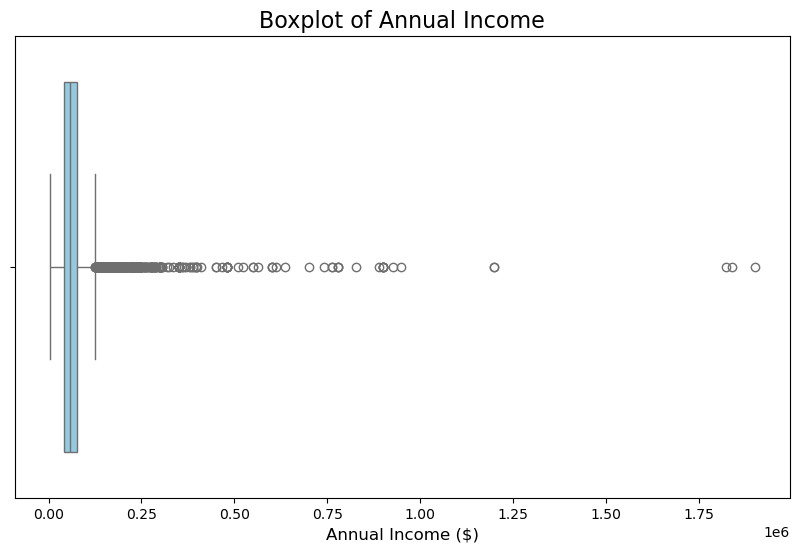

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['person_income'], color='skyblue')
plt.title('Boxplot of Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.show()

In [24]:
# Calculate the percentage of rows with unusually high income values
# This helps in identifying the extent of data with unrealistic values
# to decide whether to handle them by removal or replacement.

high_income_threshold = 1000000

num_high_income = len(df_copy[df_copy['person_income'] > high_income_threshold])

total_rows = len(df_copy)

percentage_high_income = (num_high_income / total_rows) * 100

print(f"Number of high-income rows: {num_high_income}")
print(f"Total rows: {total_rows}")
print(f"Percentage of high-income rows: {percentage_high_income:.2f}%")

Number of high-income rows: 5
Total rows: 58644
Percentage of high-income rows: 0.01%


In [25]:
# Identify and extract outliers in the 'person_income' column
# based on the interquartile range (IQR) method. 
# Any value greater than Q3 + 1.5 * IQR is considered an upper outlier.
# This helps detect and handle unusually high incomes for better data analysis.
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_copy['person_income'].quantile(0.25)
Q3 = df_copy['person_income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the upper bound for outliers using 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Extract rows with person_income values above the upper bound (outliers)
upper_outliers = df_copy[df_copy['person_income'] > upper_bound]

# Display the rows with upper outliers
print(upper_outliers)


       person_age  person_income person_home_ownership  person_emp_length  \
91             24         225000                  RENT                0.0   
92             23         150000              MORTGAGE                1.0   
115            30         170000              MORTGAGE                3.0   
132            32         150000                  RENT               16.0   
144            27         200000              MORTGAGE                7.0   
...           ...            ...                   ...                ...   
58545          28         200004              MORTGAGE                2.0   
58601          29         200000              MORTGAGE                1.0   
58604          62         150000              MORTGAGE                3.0   
58617          24         150000              MORTGAGE                2.0   
58627          38         140000                   OWN                8.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  \
91          

In [26]:
# Calculate the percentage of upper outliers in the 'person_income' column
percentage_outliers = (len(upper_outliers) / len(df_copy)) * 100

# Display the percentage
print(f"Percentage of upper outliers: {percentage_outliers:.2f}%")


Percentage of upper outliers: 4.11%


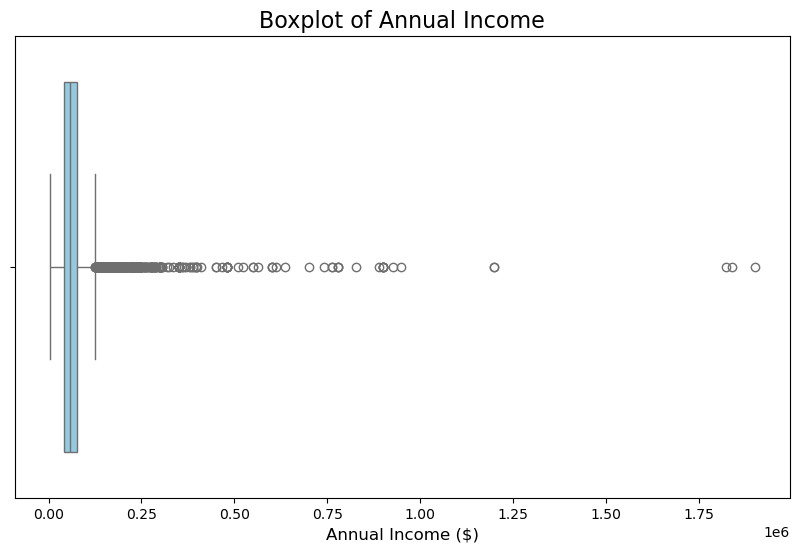

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['person_income'], color='skyblue')
plt.title('Boxplot of Annual Income', fontsize=16)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.show()


In [28]:
# This code calculates and displays the distribution of employment lengths,
# as well as the basic descriptive statistics for the 'person_emp_length' column
# to better understand the data and its spread (e.g., mean, min, max, percentiles).
distribution = df_copy['person_emp_length'].value_counts().sort_index()
print(distribution)

stats = df_copy['person_emp_length'].describe()
print(stats)

person_emp_length
0.0      7586
1.0      5203
2.0      7270
3.0      6475
4.0      5461
5.0      5839
6.0      4902
7.0      4274
8.0      3015
9.0      2290
10.0     1072
11.0     1491
12.0     1105
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
19.0       72
20.0       65
21.0       78
22.0       20
23.0       12
24.0       14
25.0        8
26.0       11
27.0        7
28.0        4
29.0        2
30.0        2
31.0        5
35.0        1
39.0        1
41.0        2
123.0       2
Name: count, dtype: int64
count    58644.000000
mean         4.700975
std          3.959807
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64


In [29]:
outliers = df_copy[df_copy['person_emp_length'] > 100]
print(outliers)

       person_age  person_income person_home_ownership  person_emp_length  \
41079          28          60350              MORTGAGE              123.0   
49252          21         192000              MORTGAGE              123.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
41079     MEDICAL          D      25000          15.95                 0.35   
49252     VENTURE          B      20000          11.49                 0.10   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
41079                         Y                           6            1  
49252                         N                           2            0  


In [30]:
# This code first calculates the mean of the 'person_emp_length' column, excluding values greater than 100 years.
# Then, it replaces any outliers (values greater than 100) in the 'person_emp_length' column with the calculated mean.
# The goal is to handle unrealistic data (outliers) by filling them with a more reasonable value (the mean) to maintain data consistency.

mean_emp_length = df_copy['person_emp_length'][df_copy['person_emp_length'] <= 100].mean()
df_copy['person_emp_length'] = df_copy['person_emp_length'].apply(lambda x: mean_emp_length if x > 100 else x)

df_copy['person_emp_length'].describe()


count    58644.000000
mean         4.696941
std          3.899073
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

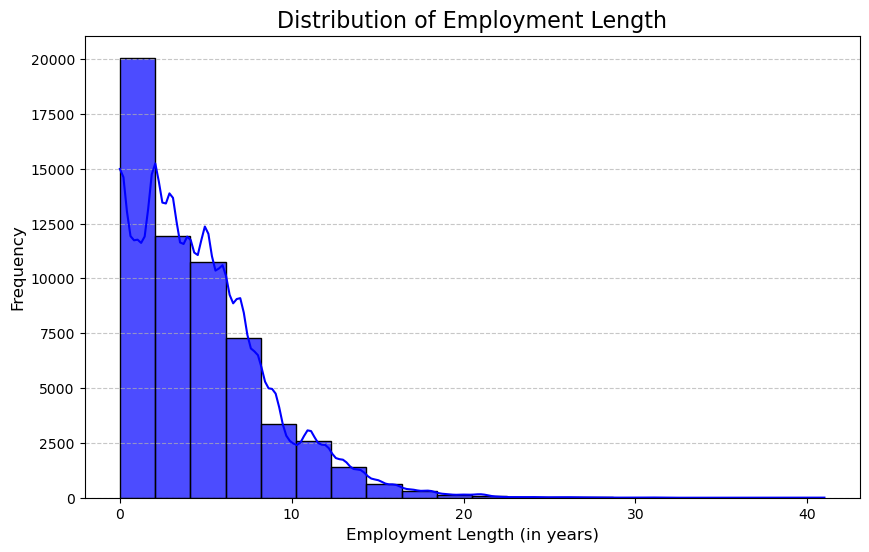

In [31]:
# The purpose of this plot is to visualize the distribution of 'person_emp_length' (employment length) in the dataset.

plt.figure(figsize=(10, 6))

sns.histplot(df_copy['person_emp_length'], bins=20, kde=True, color='blue', alpha=0.7)

plt.title('Distribution of Employment Length', fontsize=16)
plt.xlabel('Employment Length (in years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10015
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64


C:\Users\husse\AppData\Local\Temp\ipykernel_24760\556134077.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_intent', data=df_copy, palette='viridis')


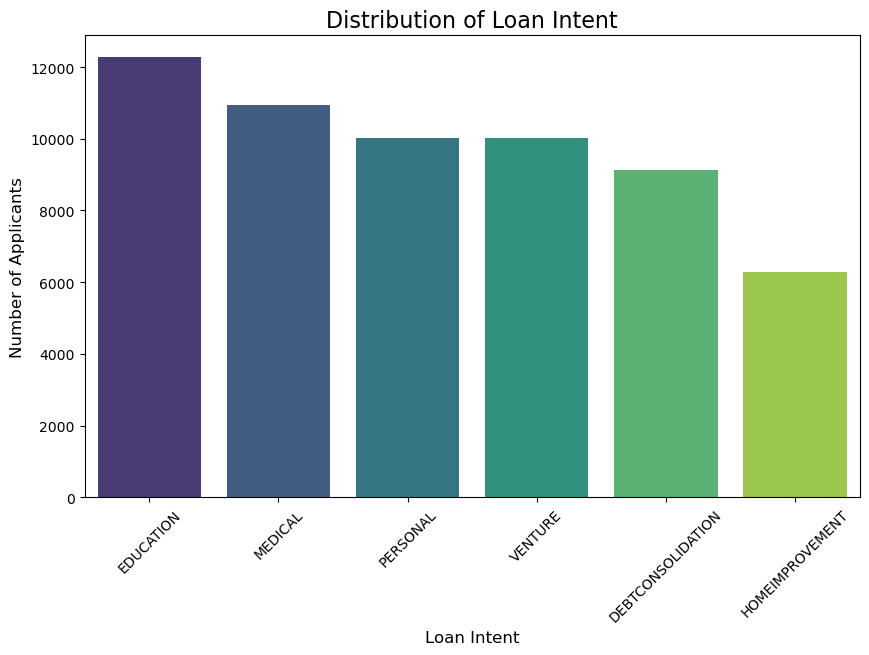

In [32]:
# The purpose of this analysis is to understand the distribution of loan intents in the dataset. 
# By calculating the frequency of each type of loan intent using value_counts(), we get an overview of how many applicants are applying for each loan purpose.
# The countplot visually represents this distribution, allowing us to see the most and least common loan intents.
# This helps identify which loan purposes are most popular among applicants, providing insights into market trends and the financial needs of customers.
# The plot is further customized with labels and titles for clarity, and the x-axis labels are rotated for better readability.

intent_distribution = df_copy['loan_intent'].value_counts()
print(intent_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(x='loan_intent', data=df_copy, palette='viridis')

plt.title('Distribution of Loan Intent', fontsize=16)
plt.xlabel('Loan Intent', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.xticks(rotation=45) 

plt.show()

C:\Users\husse\AppData\Local\Temp\ipykernel_24760\3983668982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_grade', data=df_copy, palette='coolwarm')


loan_grade
A    20984
B    20399
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64


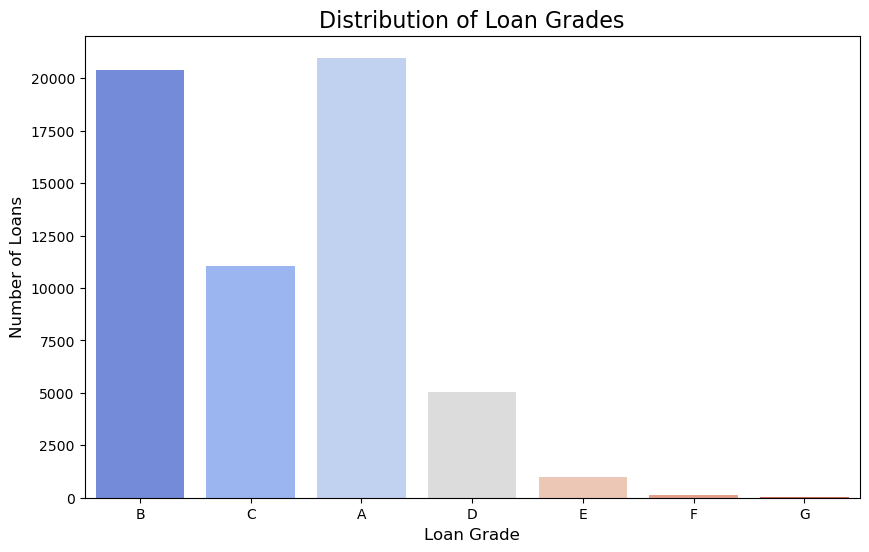

In [33]:
# The 'loan_grade' column represents the credit grade of the loan applicant based on their creditworthiness.
# This grade helps classify loans into different risk categories, such as A, B, C, D, etc., with A typically representing the least risky loans and G (or the lowest grade) representing the riskiest ones.
# By analyzing the distribution of loan grades using value_counts() and countplot(), we can understand how loans are distributed across different grades.
# This analysis helps in assessing the risk profile of the loan portfolio and making informed lending decisions.
# Additionally, understanding the relationship between loan grades and other factors like income, employment length, or credit score can provide insights into what drives the creditworthiness of applicants.

grade_distribution = df_copy['loan_grade'].value_counts()
print(grade_distribution)


plt.figure(figsize=(10, 6))
sns.countplot(x='loan_grade', data=df_copy, palette='coolwarm')

plt.title('Distribution of Loan Grades', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)

plt.show()

count    58644.000000
mean      9217.599448
std       5563.845109
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


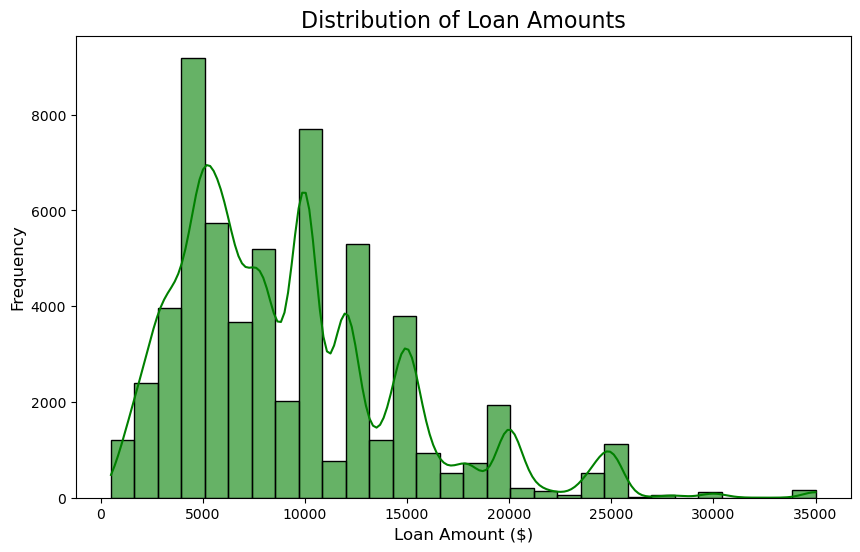

In [34]:
# Generating a statistical summary of the 'loan_amnt' column to understand the distribution of loan amounts.
# This includes key metrics such as count, mean, standard deviation, min, max, and quartiles.

loan_amnt_stats = df_copy['loan_amnt'].describe()
print(loan_amnt_stats)



plt.figure(figsize=(10, 6))
sns.histplot(df_copy['loan_amnt'], bins=30, kde=True, color='green', alpha=0.6)
plt.title('Distribution of Loan Amounts', fontsize=16)
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\husse\AppData\Local\Temp\ipykernel_24760\3216859961.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df_copy, palette='coolwarm')


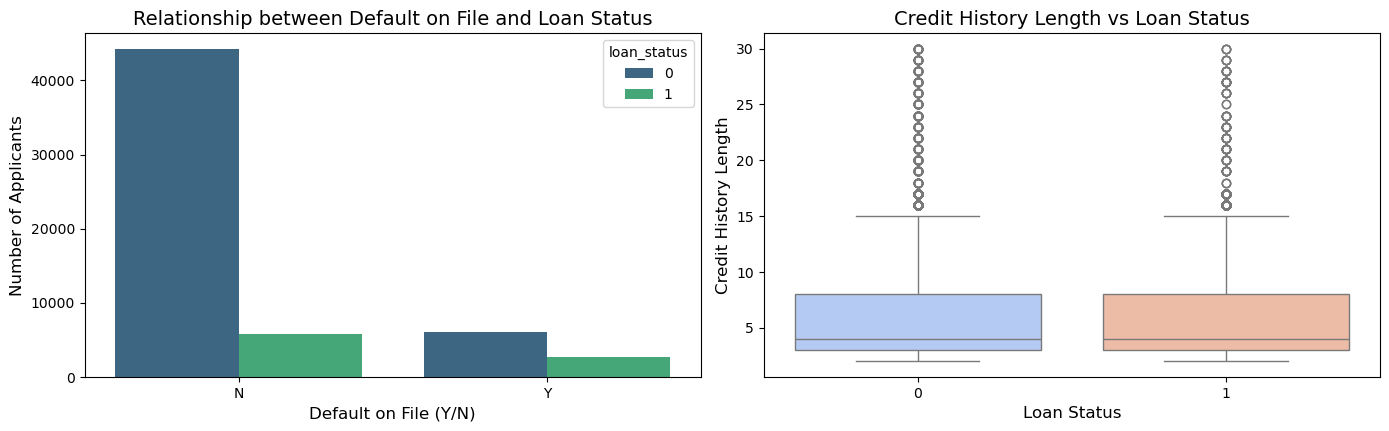

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

#   `cb_person_default_on_file` و `loan_status`
plt.subplot(2, 2, 1)
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df_copy, palette='viridis')
plt.title('Relationship between Default on File and Loan Status', fontsize=14)
plt.xlabel('Default on File (Y/N)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(x='loan_status', y='cb_person_cred_hist_length', data=df_copy, palette='coolwarm')
plt.title('Credit History Length vs Loan Status', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Credit History Length', fontsize=12)

plt.tight_layout()
plt.show()


In [36]:
df_copy.head(1)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0


person_home_ownership
RENT        30594
MORTGAGE    24823
OWN          3138
OTHER          89
Name: count, dtype: int64


C:\Users\husse\AppData\Local\Temp\ipykernel_24760\683075658.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='person_home_ownership', data=df_copy, palette='Set2')


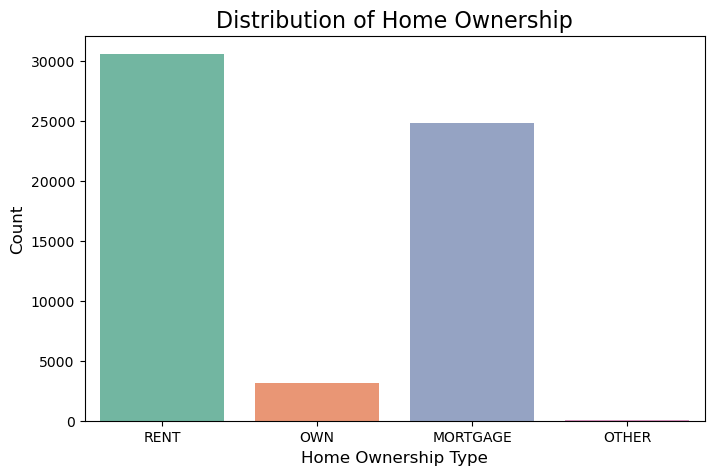

In [37]:
# Analyze the distribution of home ownership types in the dataset
# to understand the financial stability and housing situation of applicants.
ownership_distribution = df_copy['person_home_ownership'].value_counts()
print(ownership_distribution)


plt.figure(figsize=(8, 5))
sns.countplot(x='person_home_ownership', data=df_copy, palette='Set2')

plt.title('Distribution of Home Ownership', fontsize=16)
plt.xlabel('Home Ownership Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# عرض الرسم
plt.show()


count    58644.000000
mean        10.677873
std          3.034723
min          5.420000
25%          7.880000
50%         10.750000
75%         12.990000
max         23.220000
Name: loan_int_rate, dtype: float64


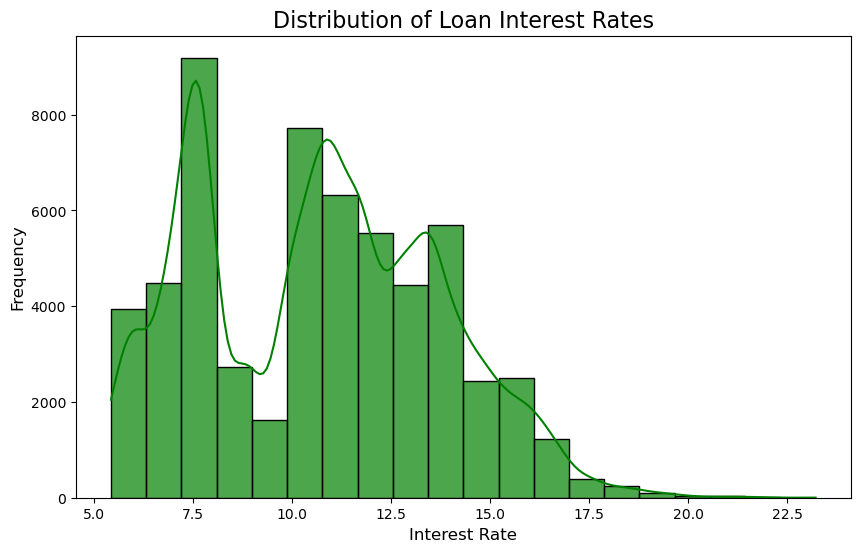

In [38]:
# Analyzing the distribution of loan interest rates to understand how interest rates vary
# across different loan applicants. A higher interest rate typically indicates a higher 
# perceived risk or poor credit history, while lower rates are associated with better 
# credit scores and lower risk.
interest_rate_stats = df_copy['loan_int_rate'].describe()
print(interest_rate_stats)


plt.figure(figsize=(10, 6))
sns.histplot(df_copy['loan_int_rate'], bins=20, kde=True, color='green', alpha=0.7)

plt.title('Distribution of Loan Interest Rates', fontsize=16)
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


In [39]:
# Analyze the distribution of the loan-to-income ratio to understand how much
# of an applicant's income is being used for the loan. A higher ratio indicates a
# higher burden of debt relative to income, which might increase the risk of default.
loan_income_stats = df_copy['loan_percent_income'].describe()
print(loan_income_stats)


count    58644.000000
mean         0.159237
std          0.091693
min          0.000000
25%          0.090000
50%          0.140000
75%          0.210000
max          0.830000
Name: loan_percent_income, dtype: float64


In [40]:
# Calculating the 25th and 75th percentiles (Q1 and Q3) for the 'loan_percent_income' column
Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Defining the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filtering rows where the 'loan_percent_income' exceeds the upper bound
upper_outliers = df_copy[df_copy['loan_percent_income'] > upper_bound]

# Printing the rows with upper outliers
print(upper_outliers)


       person_age  person_income person_home_ownership  person_emp_length  \
67             26          30000                  RENT                2.0   
75             28          27000                   OWN                0.0   
81             30          45600                  RENT                6.0   
87             31          30000                  RENT                0.0   
137            25          44004                  RENT                2.0   
...           ...            ...                   ...                ...   
58490          25          30000                  RENT                9.0   
58581          24          54996                  RENT                6.0   
58603          24          49000                  RENT                6.0   
58611          21          24000                  RENT                5.0   
58624          22          36000                  RENT                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  \
67        

In [41]:
percentage_outliers = len(upper_outliers) / len(df_copy) * 100
print(f"Percentage of upper outliers: {percentage_outliers:.2f}%")

Percentage of upper outliers: 2.06%


In [42]:
high_loan_percent_rows = df_copy[df_copy['loan_percent_income'] == 0.83]

print(high_loan_percent_rows)


       person_age  person_income person_home_ownership  person_emp_length  \
49179          39          12000                  RENT                0.0   

      loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
49179    PERSONAL          C      16000          10.78                 0.83   

      cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
49179                         N                          12            1  


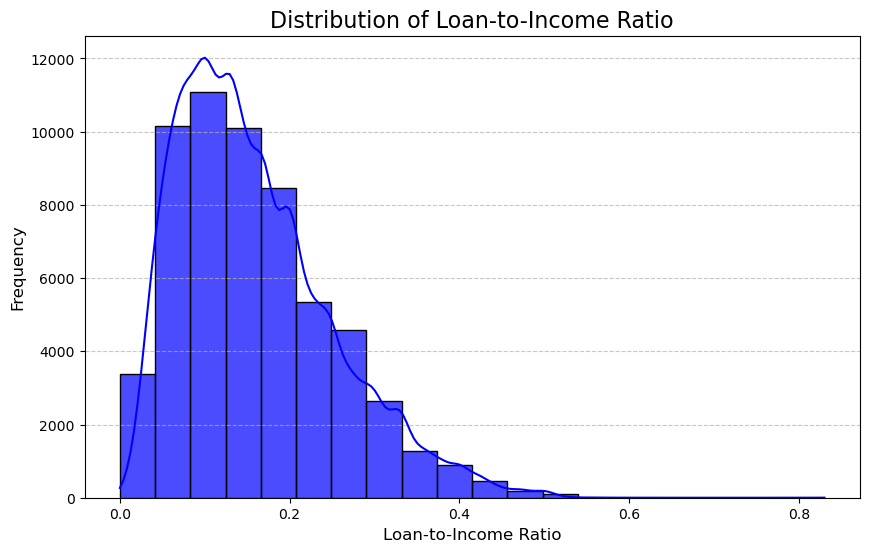

In [43]:

plt.figure(figsize=(10, 6))
# Plotting the distribution of the loan-to-income ratio with a histogram and KDE
sns.histplot(df_copy['loan_percent_income'], bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Loan-to-Income Ratio', fontsize=16)
plt.xlabel('Loan-to-Income Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\husse\AppData\Local\Temp\ipykernel_24760\113781915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cb_person_default_on_file', data=df_copy, palette='coolwarm')


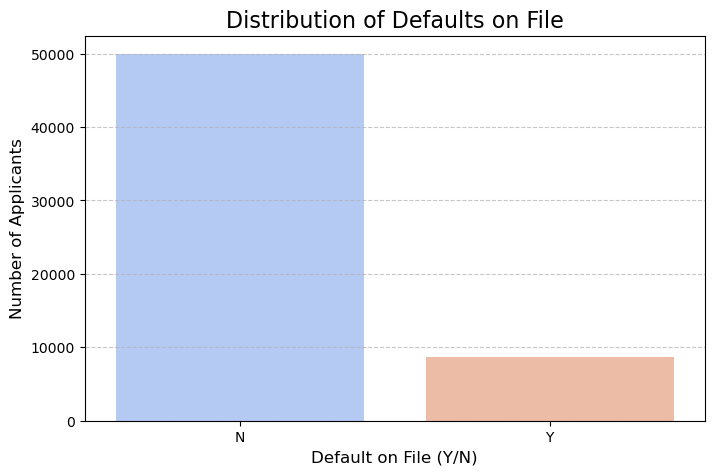

In [44]:
# Visualizing the distribution of past defaults ('Y' for Yes, 'N' for No) in the dataset.
# This helps us understand how many applicants have a history of defaulting on payments,
# which could be a significant factor in loan approval decisions.
plt.figure(figsize=(8, 5))
sns.countplot(x='cb_person_default_on_file', data=df_copy, palette='coolwarm')
plt.title('Distribution of Defaults on File', fontsize=16)
plt.xlabel('Default on File (Y/N)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


loan_status
0    50294
1     8350
Name: count, dtype: int64


C:\Users\husse\AppData\Local\Temp\ipykernel_24760\3158831241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df_copy, palette='viridis')


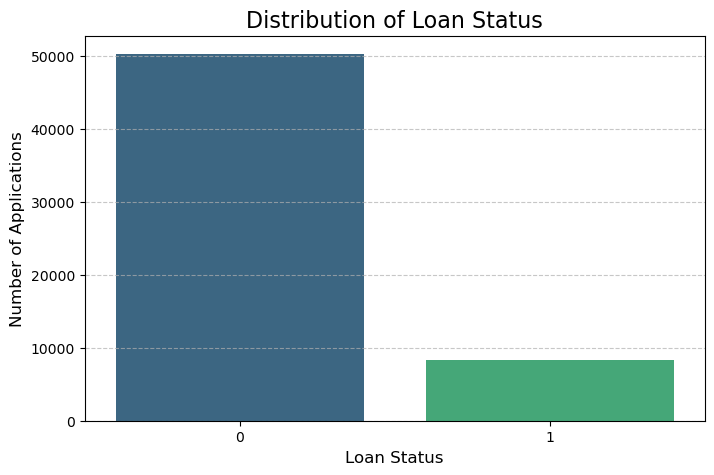

In [45]:
# Visualizing the distribution of loan status to understand how many loans are approved or rejected.
# This analysis can help identify trends and potential factors affecting loan approval.
distripution = df_copy['loan_status'].value_counts()
print(distripution)
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df_copy, palette='viridis')
plt.title('Distribution of Loan Status', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [46]:
accepted_loans_df = df_copy[df_copy['loan_status'] == 1]
print(accepted_loans_df.head())
print("the number of berson is accebted:", accepted_loans_df.shape[0])

    person_age  person_income person_home_ownership  person_emp_length  \
11          22          33000                  RENT                6.0   
24          22          30000                  RENT                3.0   
25          25          25000                  RENT                3.0   
38          30          54000                  RENT                0.0   
39          22          32000                  RENT                6.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
11    PERSONAL          B      10000          11.12                 0.30   
24     MEDICAL          D       5000          16.49                 0.17   
25     VENTURE          C       3500          13.49                 0.14   
38     MEDICAL          B      12500          11.71                 0.24   
39   EDUCATION          D       8000          15.58                 0.25   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
11                        

In [47]:
# Calculate and display the distribution of homeownership among approved individuals
print("Homeownership distribution for accepted individuals:")
print(accepted_loans_df['person_home_ownership'].value_counts())


Homeownership distribution for accepted individuals:
person_home_ownership
RENT        6809
MORTGAGE    1483
OWN           43
OTHER         15
Name: count, dtype: int64


In [48]:
# Calculate and display the distribution of loan purposes for approved individuals
print("Loan purpose distribution for accepted individuals:")
print(accepted_loans_df['loan_intent'].value_counts())


Loan purpose distribution for accepted individuals:
loan_intent
MEDICAL              1949
DEBTCONSOLIDATION    1729
PERSONAL             1330
EDUCATION            1322
HOMEIMPROVEMENT      1091
VENTURE               929
Name: count, dtype: int64


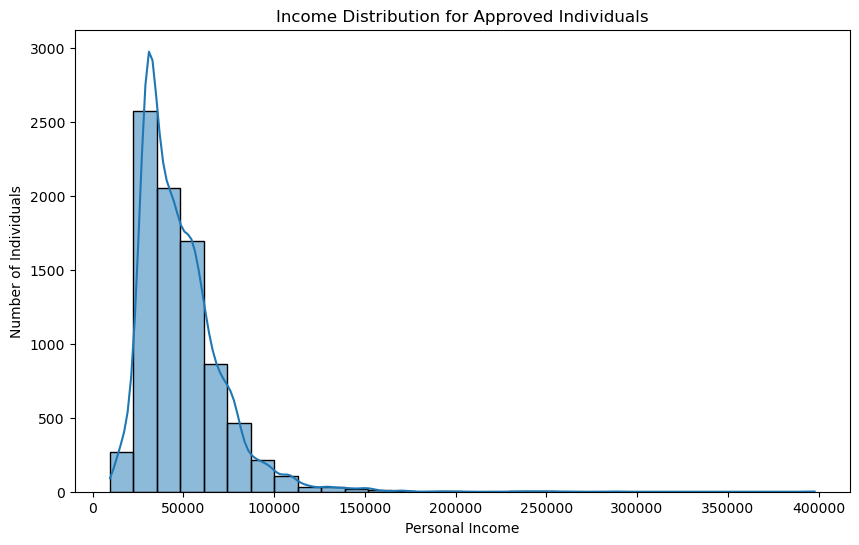

In [49]:
# Plotting the distribution of personal income for approved individuals
plt.figure(figsize=(10, 6))
sns.histplot(accepted_loans_df['person_income'], kde=True, bins=30)
plt.title('Income Distribution for Approved Individuals')
plt.xlabel('Personal Income')
plt.ylabel('Number of Individuals')
plt.show()


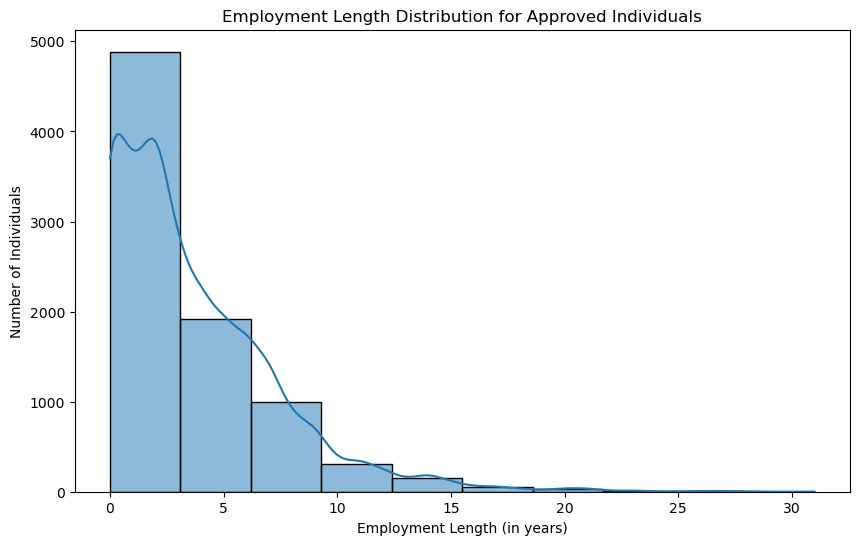

In [50]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of employment length for approved individuals
sns.histplot(accepted_loans_df['person_emp_length'], kde=True, bins=10)
plt.title('Employment Length Distribution for Approved Individuals')
plt.xlabel('Employment Length (in years)')
plt.ylabel('Number of Individuals')
plt.show()


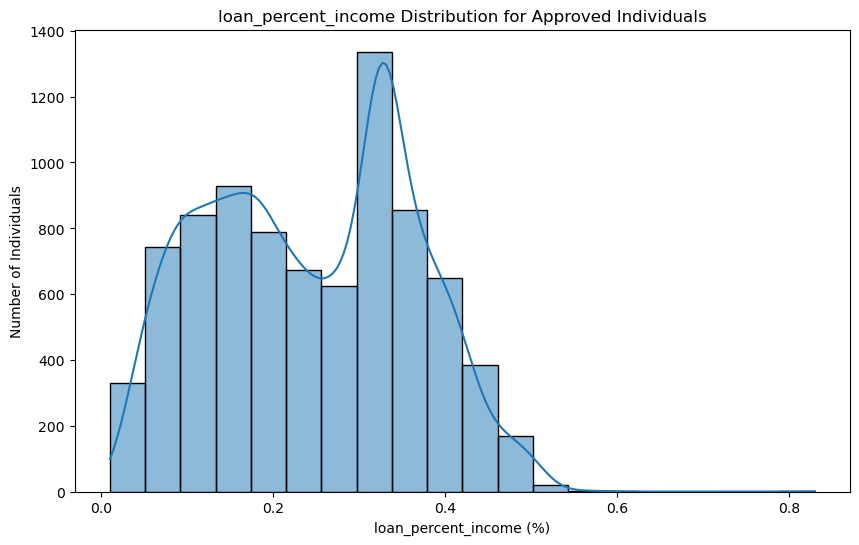

In [51]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of loan-to-income ratio for approved individuals
sns.histplot(accepted_loans_df['loan_percent_income'], kde=True, bins=20)
plt.title('loan_percent_income Distribution for Approved Individuals')
plt.xlabel('loan_percent_income (%)')
plt.ylabel('Number of Individuals')
plt.show()


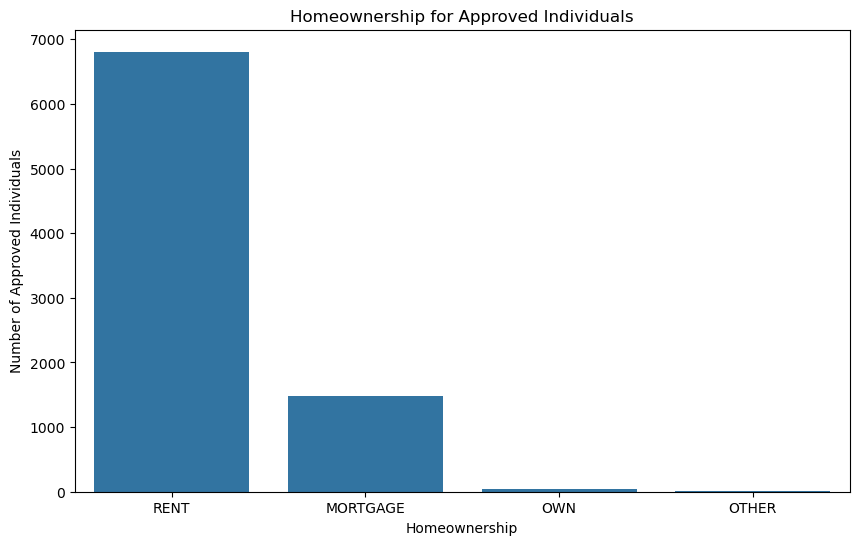

In [52]:
plt.figure(figsize=(10, 6))
# Plotting the count of homeownership categories for approved individuals
sns.countplot(x='person_home_ownership', data=accepted_loans_df)
plt.title('Homeownership for Approved Individuals')
plt.xlabel('Homeownership')
plt.ylabel('Number of Approved Individuals')
plt.show()


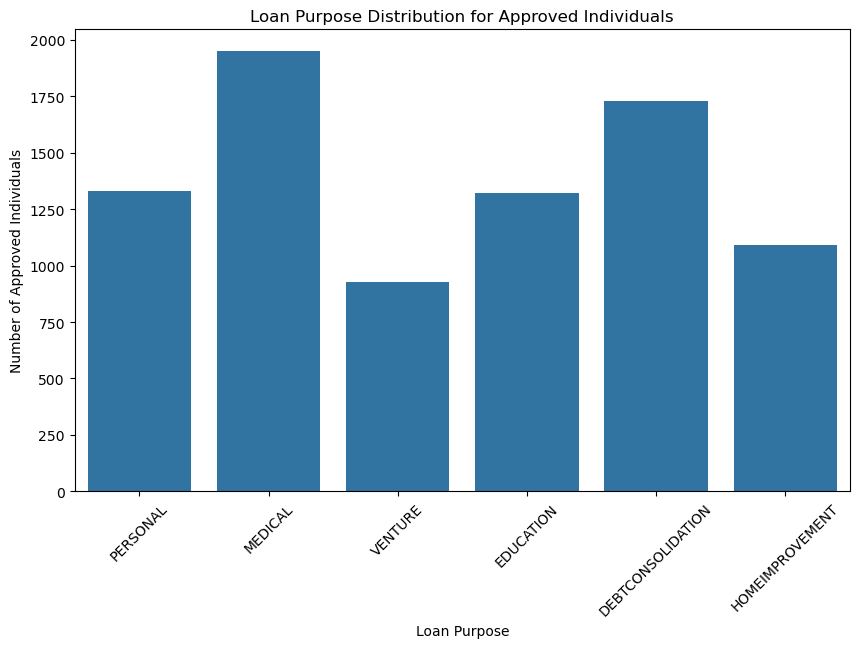

In [53]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of loan purposes for approved individuals
sns.countplot(x='loan_intent', data=accepted_loans_df)
plt.title('Loan Purpose Distribution for Approved Individuals')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Approved Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


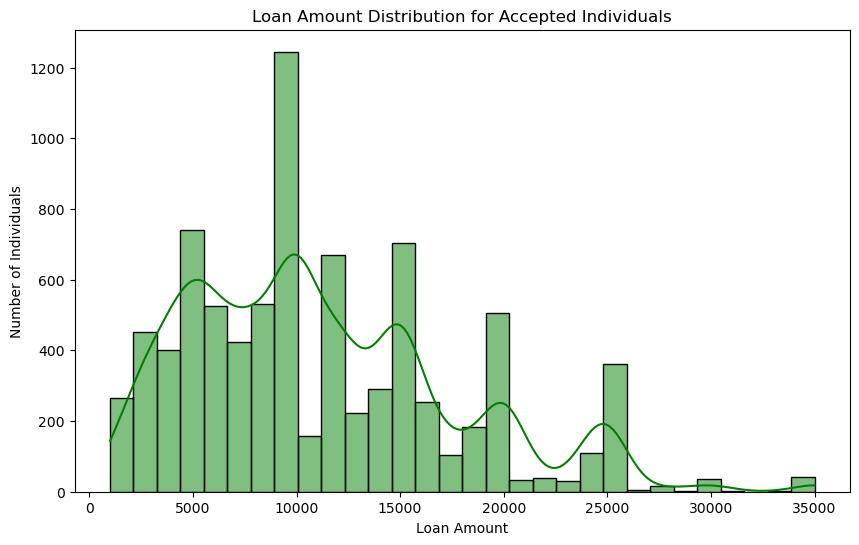

In [54]:
# Plotting the loan amount distribution for accepted individuals
plt.figure(figsize=(10, 6))
sns.histplot(accepted_loans_df['loan_amnt'], kde=True, bins=30, color='green')
plt.title('Loan Amount Distribution for Accepted Individuals')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Individuals')
plt.show()

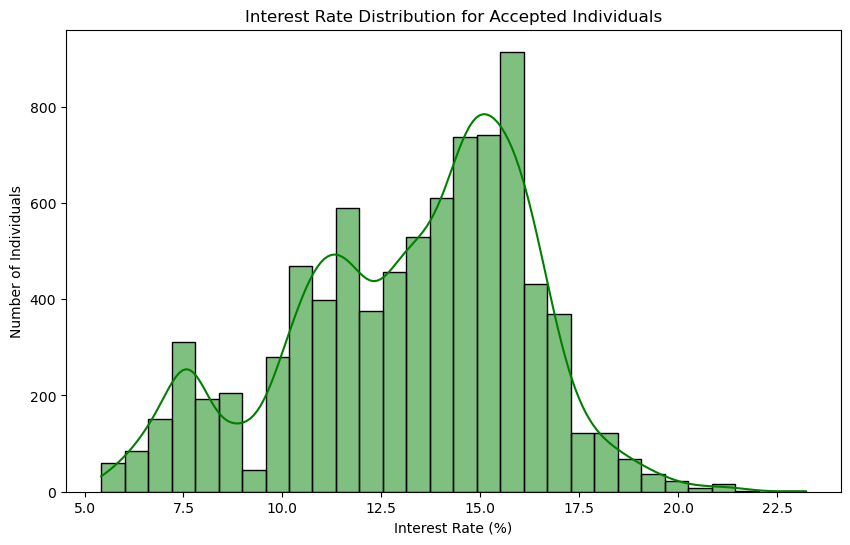

In [55]:
# Plotting the interest rate distribution for accepted individuals
plt.figure(figsize=(10, 6))
sns.histplot(accepted_loans_df['loan_int_rate'], kde=True, bins=30, color='green')
plt.title('Interest Rate Distribution for Accepted Individuals')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Individuals')
plt.show()


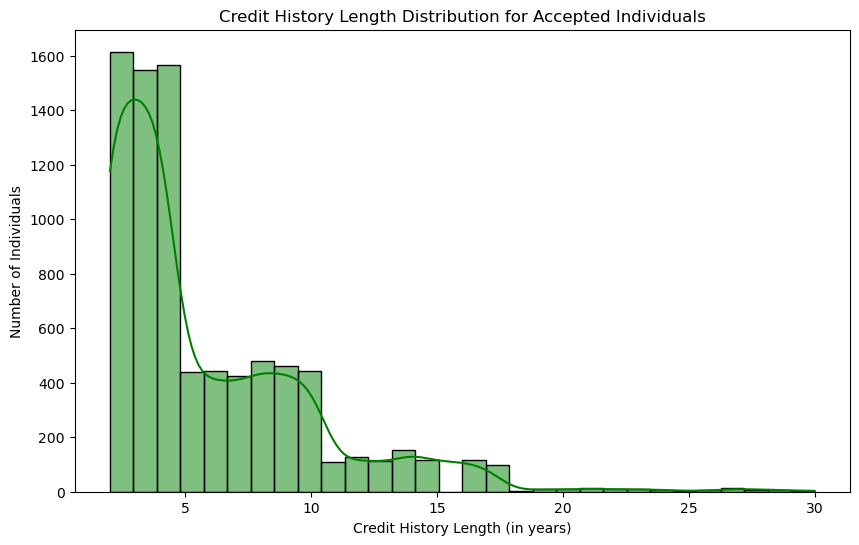

In [56]:
# Plotting the credit history length distribution for accepted individuals
plt.figure(figsize=(10, 6))
sns.histplot(accepted_loans_df['cb_person_cred_hist_length'], kde=True, bins=30, color='green')
plt.title('Credit History Length Distribution for Accepted Individuals')
plt.xlabel('Credit History Length (in years)')
plt.ylabel('Number of Individuals')
plt.show()


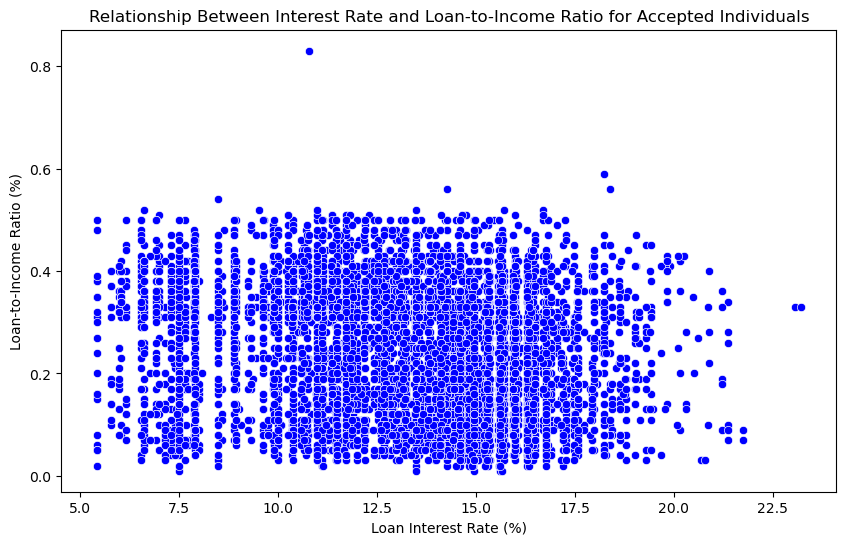

In [57]:
# Plotting the relationship between loan interest rate and loan-to-income ratio for accepted individuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_int_rate', y='loan_percent_income', data=accepted_loans_df, color='blue')
plt.title('Relationship Between Interest Rate and Loan-to-Income Ratio for Accepted Individuals')
plt.xlabel('Loan Interest Rate (%)')
plt.ylabel('Loan-to-Income Ratio (%)')
plt.show()


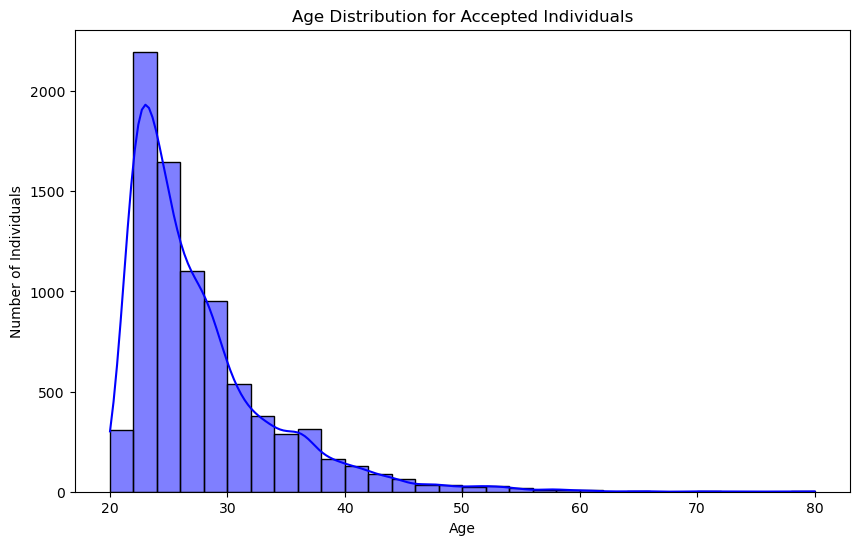

In [58]:
# Plotting the age distribution for accepted individuals
plt.figure(figsize=(10, 6))
sns.histplot(accepted_loans_df['person_age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution for Accepted Individuals')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()


In [59]:
print(accepted_loans_df['person_income'].describe())


count      8350.000000
mean      48224.661796
std       22435.665380
min        9600.000000
25%       32000.000000
50%       44000.000000
75%       59000.000000
max      397800.000000
Name: person_income, dtype: float64


In [60]:
print(accepted_loans_df['person_emp_length'].describe())


count    8350.000000
mean        3.710862
std         3.662021
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        31.000000
Name: person_emp_length, dtype: float64


In [61]:
print(accepted_loans_df['loan_percent_income'].describe())


count    8350.000000
mean        0.244363
std         0.118654
min         0.010000
25%         0.140000
50%         0.250000
75%         0.330000
max         0.830000
Name: loan_percent_income, dtype: float64


In [62]:
rejected_loans_df = df_copy[df_copy['loan_status'] == 0]
print("the number of person rejected:", rejected_loans_df.shape[0])


the number of person rejected: 50294


In [63]:
rejected_loans_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58637,24,75000,RENT,8.0,VENTURE,B,4000,10.75,0.05,N,4,0
58639,22,70000,RENT,6.0,DEBTCONSOLIDATION,A,10000,7.29,0.14,N,4,0
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [64]:
df_copy

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [65]:
# Calculate and display the distribution of homeownership among rejected individuals
print("Homeownership distribution for rejected individuals:")
print(rejected_loans_df['person_home_ownership'].value_counts())


Homeownership distribution for rejected individuals:
person_home_ownership
RENT        23785
MORTGAGE    23340
OWN          3095
OTHER          74
Name: count, dtype: int64


In [66]:
# Calculate and display the distribution of loan purposes for rejected individuals
print("Loan purpose distribution for rejected individuals:")
print(rejected_loans_df['loan_intent'].value_counts())


Loan purpose distribution for rejected individuals:
loan_intent
EDUCATION            10949
VENTURE               9082
MEDICAL               8985
PERSONAL              8685
DEBTCONSOLIDATION     7404
HOMEIMPROVEMENT       5189
Name: count, dtype: int64


In [67]:
# Display the distribution of loan grades for rejected individuals
print("Loan grade distribution for rejected individuals:")
print(rejected_loans_df['loan_grade'].value_counts())


Loan grade distribution for rejected individuals:
loan_grade
A    19952
B    18312
C     9542
D     2046
E      378
F       58
G        6
Name: count, dtype: int64


In [68]:
# Display the distribution of individuals with a negative credit history for rejected individuals
print("Distribution of individuals with a negative credit history for rejected individuals:")
print(rejected_loans_df['cb_person_default_on_file'].value_counts())


Distribution of individuals with a negative credit history for rejected individuals:
cb_person_default_on_file
N    44193
Y     6101
Name: count, dtype: int64


In [69]:
# Calculate the average income for each loan purpose
average_income_by_intent = rejected_loans_df.groupby('loan_intent')['person_income'].mean()
print("Average income for each loan purpose:")
print(average_income_by_intent)


Average income for each loan purpose:
loan_intent
DEBTCONSOLIDATION    66940.573339
EDUCATION            64389.381131
HOMEIMPROVEMENT      78147.909616
MEDICAL              61557.504730
PERSONAL             67802.283592
VENTURE              66635.325589
Name: person_income, dtype: float64


In [70]:
# Calculate the number of rejected individuals for each loan grade and loan purpose
loan_grade_intent_count = rejected_loans_df.groupby(['loan_grade', 'loan_intent']).size()
print("Number of rejected individuals by loan grade and loan purpose:")
print(loan_grade_intent_count)


Number of rejected individuals by loan grade and loan purpose:
loan_grade  loan_intent      
A           DEBTCONSOLIDATION    3200
            EDUCATION            4204
            HOMEIMPROVEMENT      2019
            MEDICAL              3467
            PERSONAL             3506
            VENTURE              3556
B           DEBTCONSOLIDATION    2732
            EDUCATION            3813
            HOMEIMPROVEMENT      1785
            MEDICAL              3558
            PERSONAL             3067
            VENTURE              3357
C           DEBTCONSOLIDATION    1416
            EDUCATION            2254
            HOMEIMPROVEMENT       955
            MEDICAL              1832
            PERSONAL             1503
            VENTURE              1582
D           DEBTCONSOLIDATION      52
            EDUCATION             557
            HOMEIMPROVEMENT       334
            MEDICAL               116
            PERSONAL              514
            VENTURE              

In [71]:
# Get the income distribution using value_counts
income_distribution_rejected = rejected_loans_df['person_income'].value_counts().sort_index()
print("Income distribution for rejected individuals:")
print(income_distribution_rejected)


Income distribution for rejected individuals:
person_income
4200       1
5000       1
9600       8
10000      1
10140      1
          ..
948000     1
1200000    2
1824000    1
1839784    1
1900000    1
Name: count, Length: 2313, dtype: int64


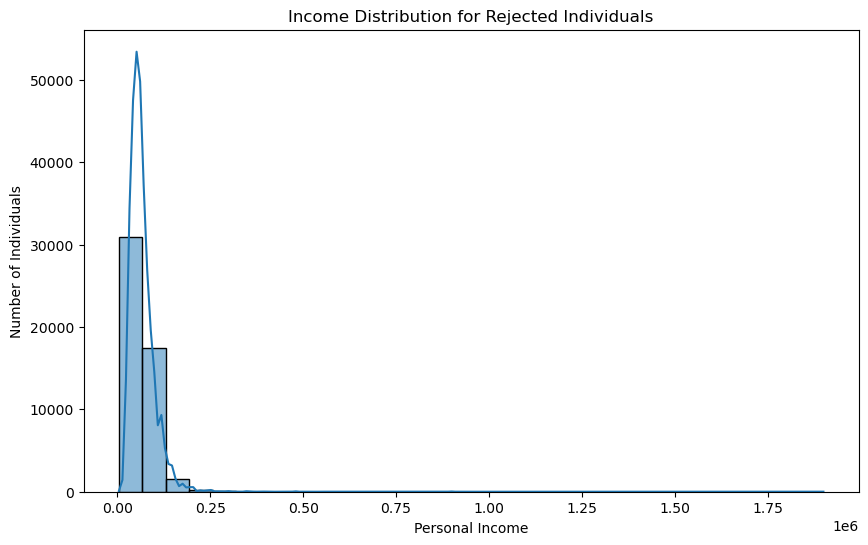

In [72]:
# Plotting the distribution of personal income for rejected individuals
plt.figure(figsize=(10, 6))
sns.histplot(rejected_loans_df['person_income'], kde=True, bins=30)
plt.title('Income Distribution for Rejected Individuals')
plt.xlabel('Personal Income')
plt.ylabel('Number of Individuals')
plt.show()


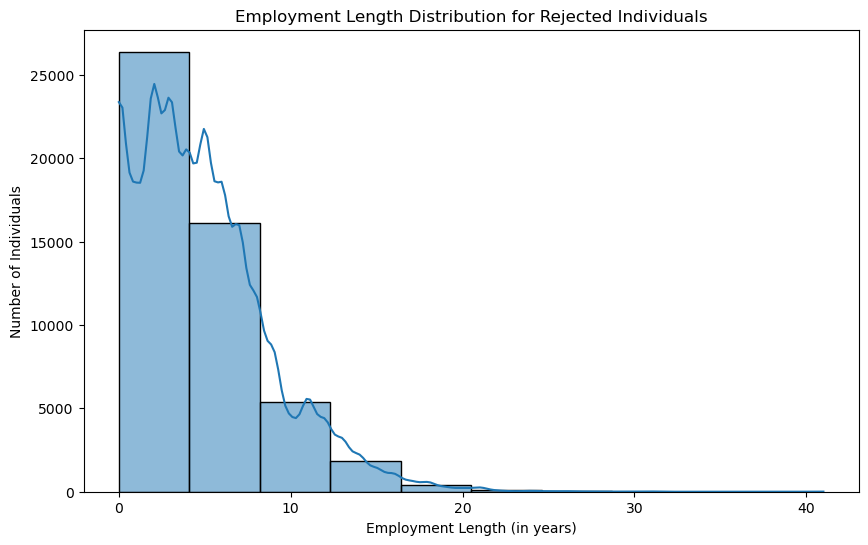

In [73]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of employment length for rejected individuals
sns.histplot(rejected_loans_df['person_emp_length'], kde=True, bins=10)
plt.title('Employment Length Distribution for Rejected Individuals')
plt.xlabel('Employment Length (in years)')
plt.ylabel('Number of Individuals')
plt.show()


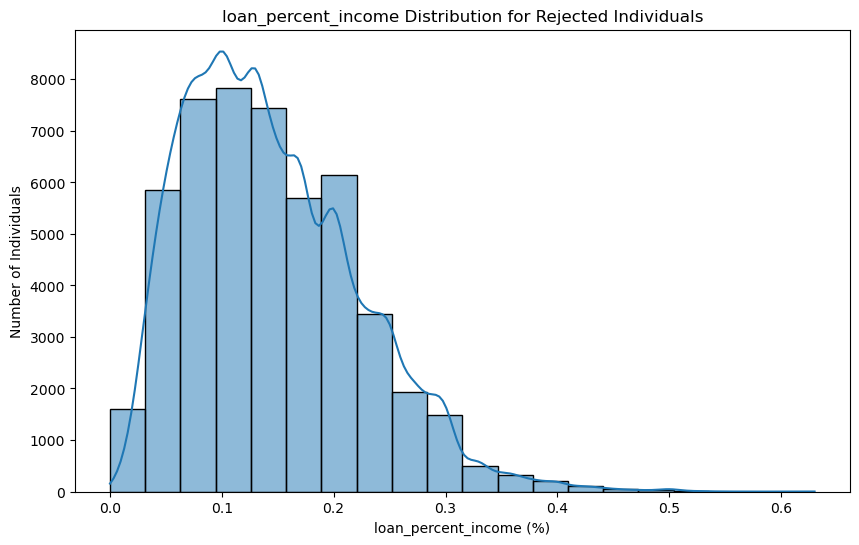

In [74]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of loan-to-income ratio for rejected individuals
sns.histplot(rejected_loans_df['loan_percent_income'], kde=True, bins=20)
plt.title('loan_percent_income Distribution for Rejected Individuals')
plt.xlabel('loan_percent_income (%)')
plt.ylabel('Number of Individuals')
plt.show()


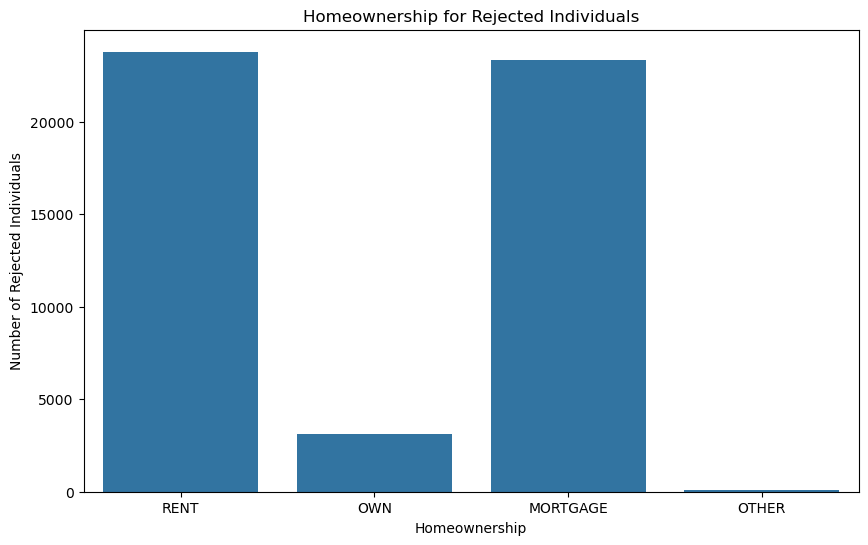

In [75]:
plt.figure(figsize=(10, 6))
# Plotting the count of homeownership categories for rejected individuals
sns.countplot(x='person_home_ownership', data=rejected_loans_df)
plt.title('Homeownership for Rejected Individuals')
plt.xlabel('Homeownership')
plt.ylabel('Number of Rejected Individuals')
plt.show()


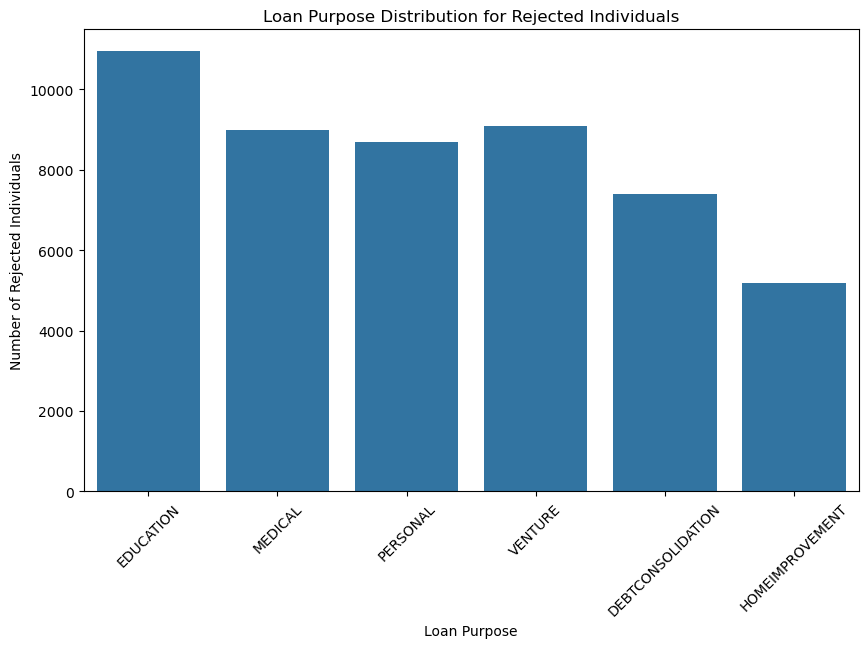

In [76]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of loan purposes for rejected individuals
sns.countplot(x='loan_intent', data=rejected_loans_df)
plt.title('Loan Purpose Distribution for Rejected Individuals')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Rejected Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


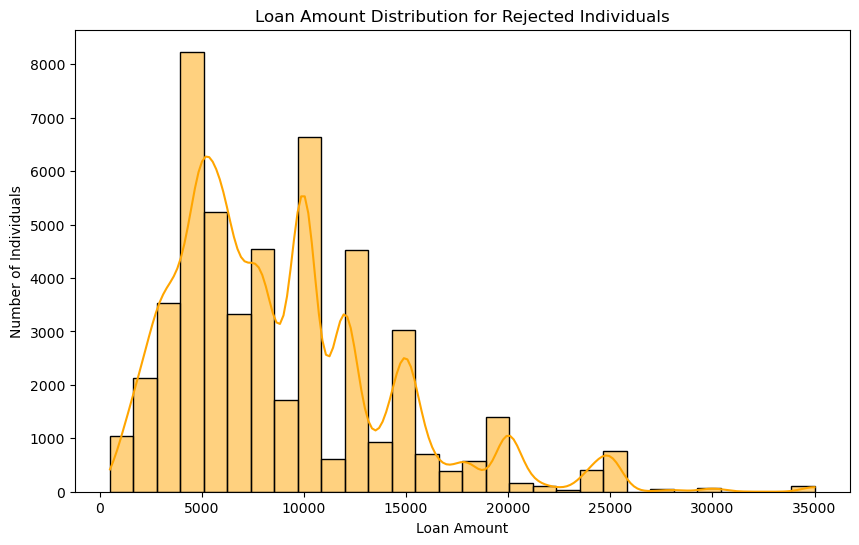

In [77]:

plt.figure(figsize=(10, 6))
# Plotting the distribution of loan amounts for rejected individuals
sns.histplot(rejected_loans_df['loan_amnt'], kde=True, bins=30, color='orange')
plt.title('Loan Amount Distribution for Rejected Individuals')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Individuals')
plt.show()


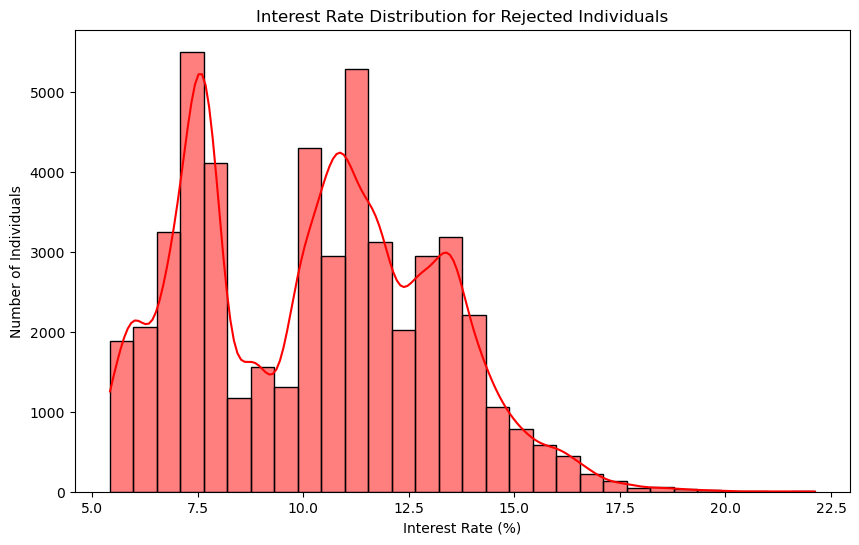

In [78]:
# Plotting the interest rate distribution for rejected individuals
plt.figure(figsize=(10, 6))
sns.histplot(rejected_loans_df['loan_int_rate'], kde=True, bins=30, color='red')
plt.title('Interest Rate Distribution for Rejected Individuals')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Number of Individuals')
plt.show()


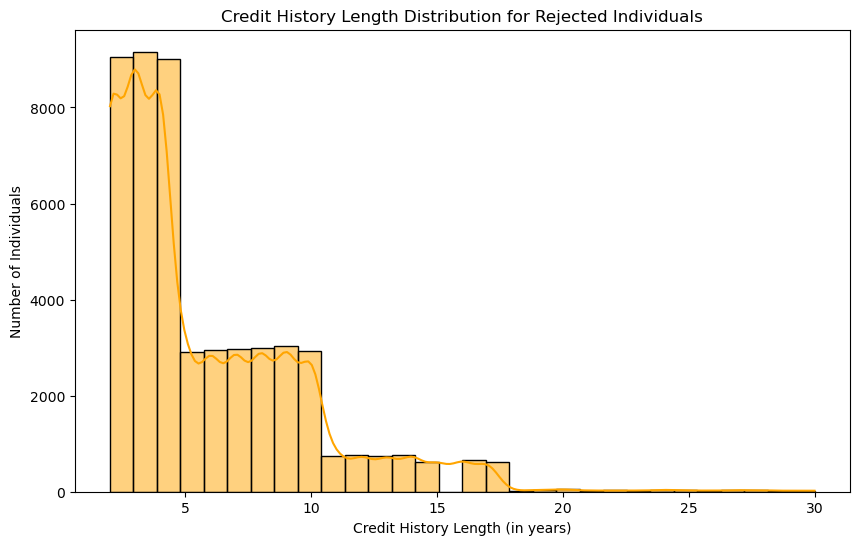

In [79]:
plt.figure(figsize=(10, 6))
# Plotting the credit history length distribution for rejected individuals
sns.histplot(rejected_loans_df['cb_person_cred_hist_length'], kde=True, bins=30, color='orange')
plt.title('Credit History Length Distribution for Rejected Individuals')
plt.xlabel('Credit History Length (in years)')
plt.ylabel('Number of Individuals')
plt.show()


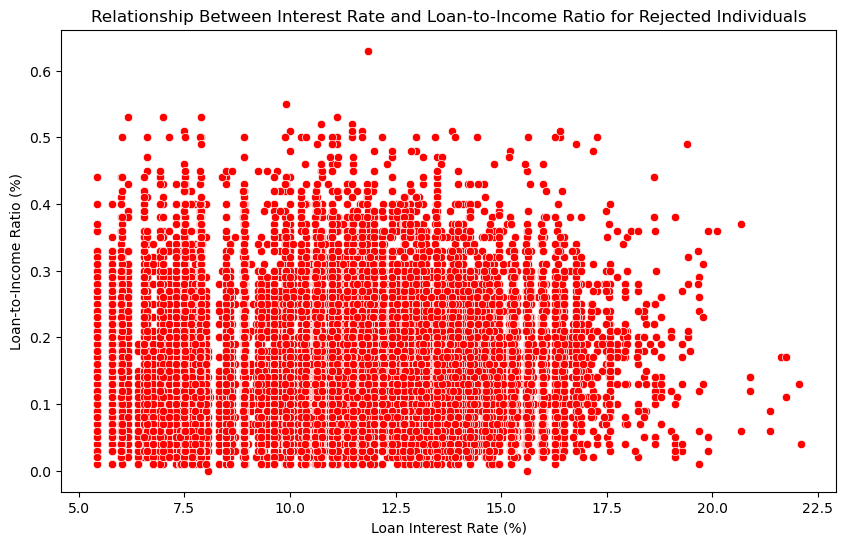

In [80]:
# Plotting the relationship between loan interest rate and loan-to-income ratio for rejected individuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_int_rate', y='loan_percent_income', data=rejected_loans_df, color='red')
plt.title('Relationship Between Interest Rate and Loan-to-Income Ratio for Rejected Individuals')
plt.xlabel('Loan Interest Rate (%)')
plt.ylabel('Loan-to-Income Ratio (%)')
plt.show()


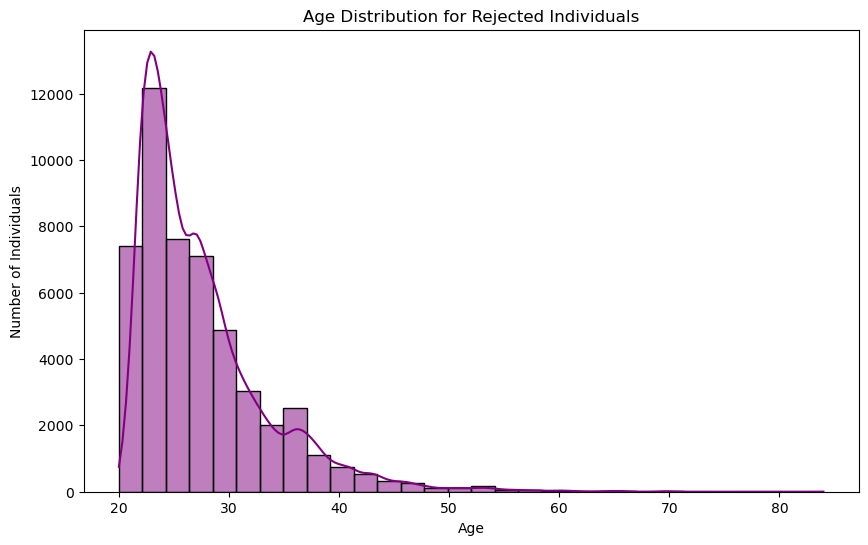

In [81]:
# Plotting the age distribution for rejected individuals
plt.figure(figsize=(10, 6))
sns.histplot(rejected_loans_df['person_age'], kde=True, bins=30, color='purple')
plt.title('Age Distribution for Rejected Individuals')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.show()


In [82]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

C:\Users\husse\AppData\Local\Temp\ipykernel_24760\1463969118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=df_copy, palette='Set2')
C:\Users\husse\AppData\Local\Temp\ipykernel_24760\1463969118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=df_copy, palette='Set2')
C:\Users\husse\AppData\Local\Temp\ipykernel_24760\1463969118.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=column, data=df_copy, palette='Set2')
C:\Users\husse\AppData\Local\Temp\

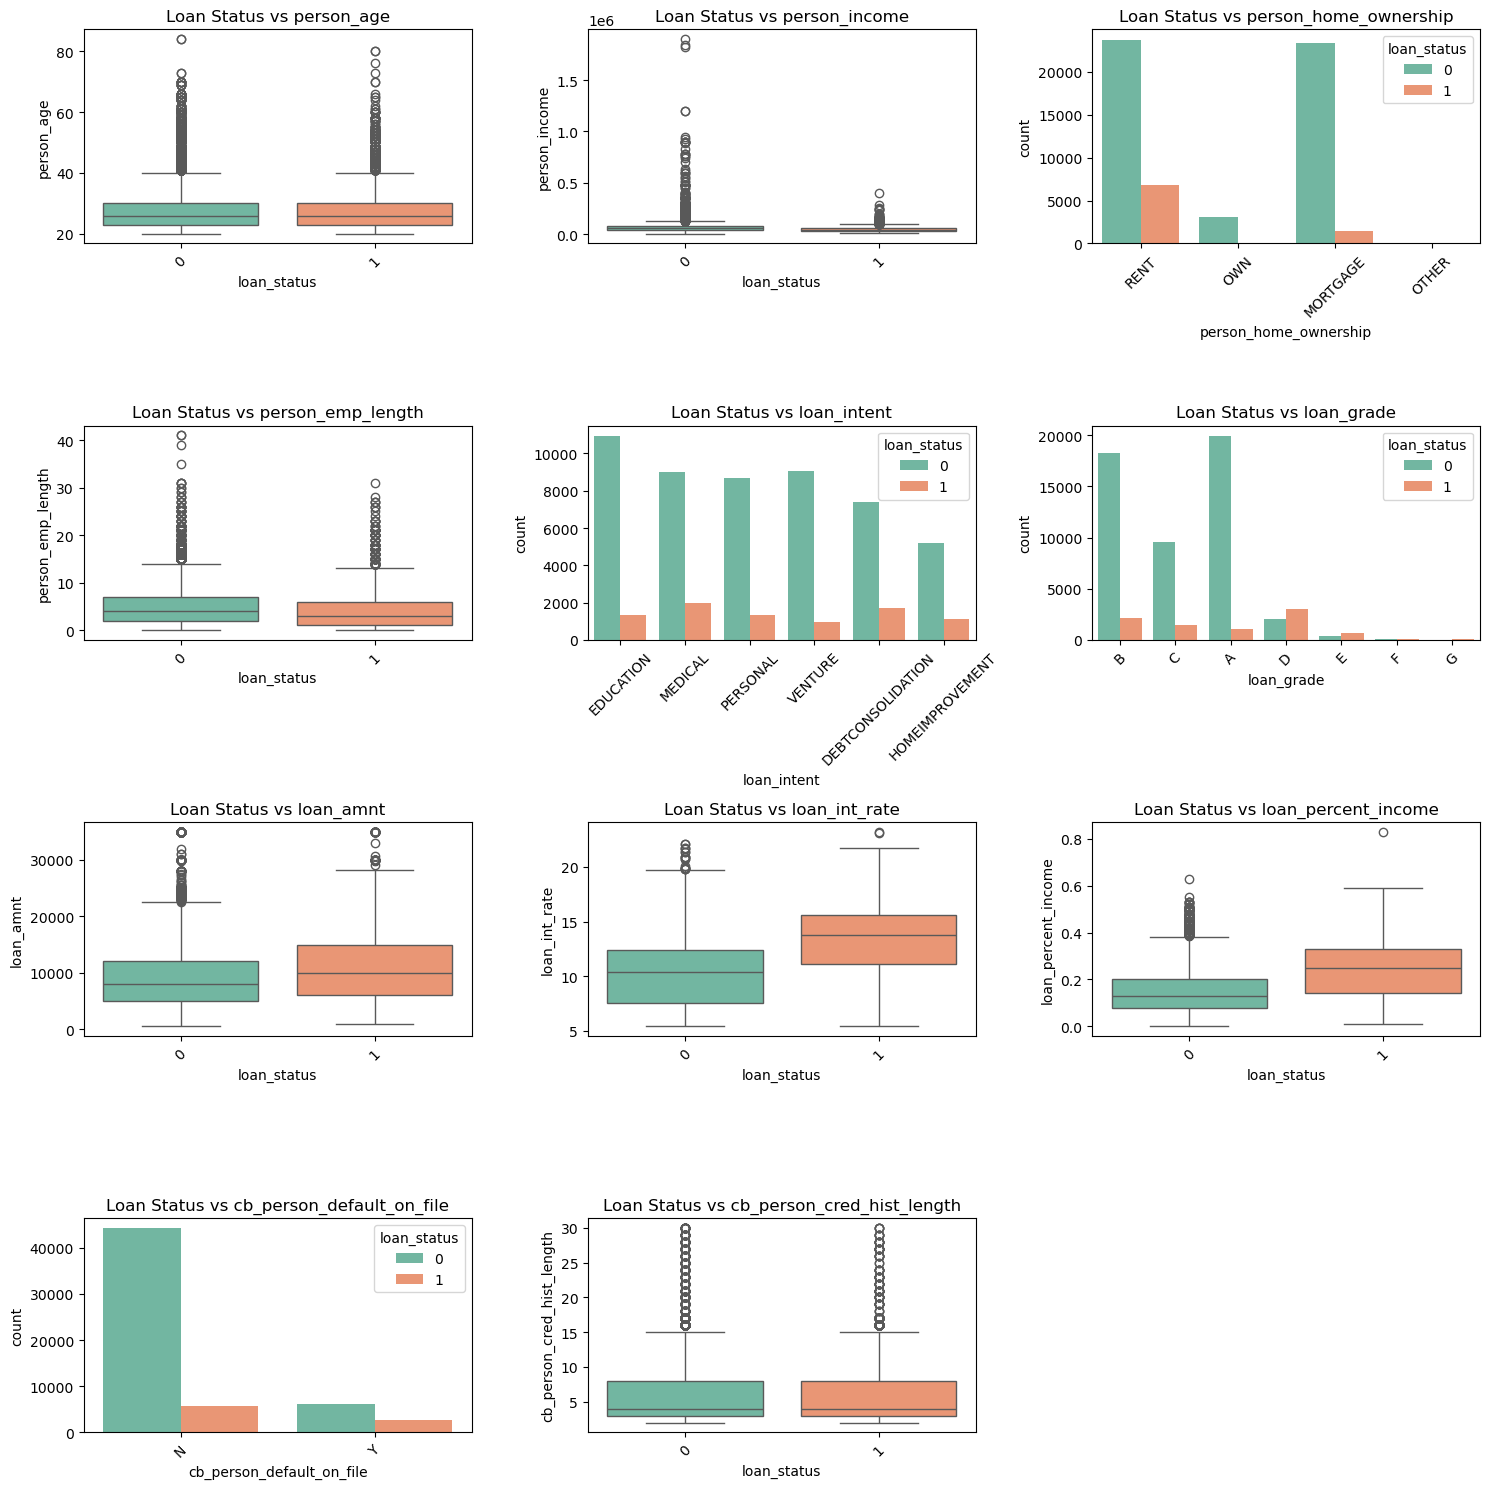

In [83]:

columns = [
    'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 
    'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status'
]

plt.figure(figsize=(15, 15))

# Loop through the specified columns (excluding the last one, which is 'loan_status')
for i, column in enumerate(columns[:-1]):  
    plt.subplot(4, 3, i+1)  # Create a subplot for each column
    
    # Check if the column is categorical or numerical
    if df_copy[column].dtype == 'object':  
        # If categorical, plot a count plot with hue based on loan status
        sns.countplot(x=column, hue='loan_status', data=df_copy, palette='Set2')
        plt.title(f'Loan Status vs {column}')
    else:  
        # If numerical, plot a box plot showing loan status vs the column values
        sns.boxplot(x='loan_status', y=column, data=df_copy, palette='Set2')
        plt.title(f'Loan Status vs {column}')
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust the layout to prevent overlap

plt.show()  # Display the plots


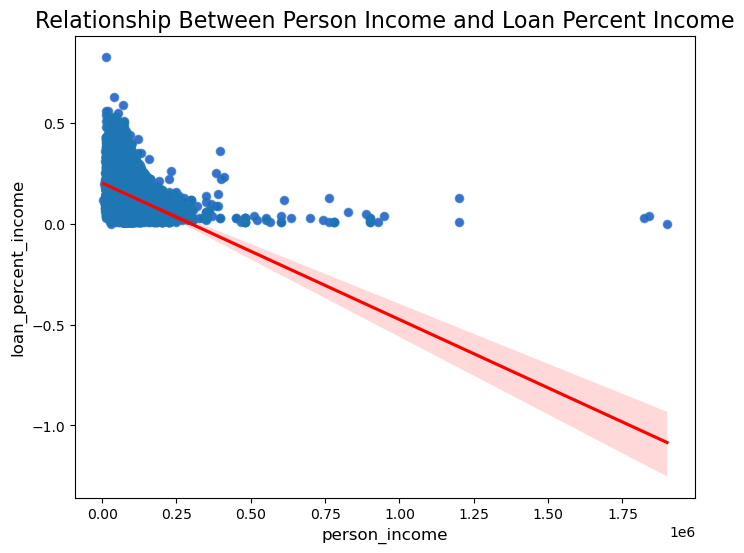

In [84]:
plt.figure(figsize=(8, 6))

# Plotting the scatter plot to show the relationship between person income and loan percent income
sns.scatterplot(x='person_income', y='loan_percent_income', data=df_copy, color='blue', alpha=0.6)
plt.title('Relationship Between Person Income and Loan Percent Income', fontsize=16)
plt.xlabel('Person Income', fontsize=12)
plt.ylabel('Loan Percent Income', fontsize=12)
sns.regplot(x='person_income', y='loan_percent_income', data=df_copy, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()



In [85]:
df_copy

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [86]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Applying LabelEncoder to each column
for column in columns_to_encode:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])

# Displaying the first few rows of the data after encoding
print(df_copy.head())


   person_age  person_income  person_home_ownership  person_emp_length  \
0          37          35000                      3                0.0   
1          22          56000                      2                6.0   
2          29          28800                      2                8.0   
3          30          70000                      3               14.0   
4          22          60000                      3                2.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           1       6000          11.49                 0.17   
1            3           2       4000          13.35                 0.07   
2            4           0       6000           8.90                 0.21   
3            5           1      12000          11.11                 0.17   
4            3           0       6000           6.92                 0.10   

   cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                   

In [173]:
df_copy

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0
58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1
58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1
58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [177]:
X = df_copy.drop('loan_status', axis=1)
y = df_copy['loan_status']


In [251]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize XGBoost (without scaling or SMOTE)
xgb_model = XGBClassifier(
    random_state=200,
    eval_metric='logloss',
    learning_rate=0.5,
    n_estimators=66,
    max_depth=12,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  
)

# 3. Train the model
xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = xgb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9472

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10096
           1       0.84      0.77      0.80      1633

    accuracy                           0.95     11729
   macro avg       0.90      0.87      0.89     11729
weighted avg       0.95      0.95      0.95     11729

Confusion Matrix:
[[9849  247]
 [ 372 1261]]


In [253]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Standardizing the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Using SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 4. Initializing the RandomForest model
random_forest = RandomForestClassifier(random_state=20, class_weight='balanced', n_estimators=100)

# 5. Setting up Bagging Classifier using RandomForest as the base estimator
bagging_model = BaggingClassifier(
    estimator=random_forest,  # Using RandomForest as the base model
    n_estimators=10,          # Number of models in the ensemble
    random_state=42
)

# 6. Training the Bagging model on the resampled data
bagging_model.fit(X_train_resampled, y_train_resampled)

# 7. Making predictions on the test data
y_pred = bagging_model.predict(X_test_scaled)

# 8. Evaluating performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9473953448716855

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10096
           1       0.86      0.74      0.80      1633

    accuracy                           0.95     11729
   macro avg       0.91      0.86      0.88     11729
weighted avg       0.95      0.95      0.95     11729

Confusion Matrix:
[[9908  188]
 [ 429 1204]]


In [91]:
import pickle 

In [92]:
filename= 'loan_datal_prediction.sav'
pickle.dump(bagging_model,open(filename,'wb'))

In [93]:
#load_model=pickle.load(open('loan_data_prediction','rb'))


In [94]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [257]:
import joblib


In [96]:
import os

# Create 'models' folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save model
joblib.dump(bagging_model, "models/loan_model.pkl")

# Save scaler
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [259]:
import os
os.makedirs("models", exist_ok=True)

# 6. حفظ الموديل
joblib.dump(xgb_model, "models/xgb_loan_model.pkl")

print("✅ Model saved successfully in 'models/xgb_loan_model.pkl'")

✅ Model saved successfully in 'models/xgb_loan_model.pkl'
